In [1]:
#1. Import Library
import pandas as pd
import numpy as np

In [2]:
#2. Import Data
df = pd.read_csv("dataset/customerData_500k.csv")
df.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.572411,19,5.908826,1.093430,11,Male,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1
1,63,21328.925876,10,6.970749,0.649246,20,Female,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0
2,60,150537.742465,19,35.004954,3.858211,25,Male,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0
3,19,63508.762549,10,14.818000,7.554374,20,Male,Furniture,Desktop,West,Paid Ads,Premium,0,0,1,3,0
4,54,100399.558368,19,55.925462,0.197411,92,Male,Electronics,Mobile,South,Referral,Regular,1,4,1,2,0


In [3]:
#3. Inspect Data
#3a. Menampilkan nama kolom
df.columns

Index(['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite',
       'CustomerTenureYears', 'LastPurchaseDaysAgo', 'Gender',
       'ProductCategory', 'PreferredDevice', 'Region', 'ReferralSource',
       'CustomerSegment', 'LoyaltyProgram', 'DiscountsAvailed', 'SessionCount',
       'CustomerSatisfaction', 'PurchaseStatus'],
      dtype='object')

In [4]:
#3. Inspect data
#3c. Merapihkan nama kolom
df = df.rename(columns={
    'Age': 'Age',
    'AnnualIncome': 'Annual Income',
    'NumberOfPurchases': 'Number of Purchases',
    'TimeSpentOnWebsite': 'Time Spent on Website',
    'CustomerTenureYears': 'Customer Tenure Years',
    'LastPurchaseDaysAgo': 'Last Purchase Days Ago',
    'Gender': 'Gender',
    'ProductCategory': 'Product Category',
    'PreferredDevice': 'Preferred Device',
    'Region': 'Region',
    'ReferralSource': 'Referral Source',
    'CustomerSegment': 'Customer Segment',
    'LoyaltyProgram': 'Loyalty Program',
    'DiscountsAvailed': 'Discounts Availed',
    'SessionCount': 'Session Count',
    'CustomerSatisfaction': 'Customer Satisfaction'
})


In [5]:
#3. Inspect Data
#3d. Untuk menampilkan type data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     500000 non-null  int64  
 1   Annual Income           500000 non-null  float64
 2   Number of Purchases     500000 non-null  int64  
 3   Time Spent on Website   500000 non-null  float64
 4   Customer Tenure Years   500000 non-null  float64
 5   Last Purchase Days Ago  500000 non-null  int64  
 6   Gender                  500000 non-null  object 
 7   Product Category        500000 non-null  object 
 8   Preferred Device        500000 non-null  object 
 9   Region                  500000 non-null  object 
 10  Referral Source         500000 non-null  object 
 11  Customer Segment        500000 non-null  object 
 12  Loyalty Program         500000 non-null  int64  
 13  Discounts Availed       500000 non-null  int64  
 14  Session Count       

In [6]:
#3. Inspect Data
#3c. Untuk mmengganti type data float menjadi integer
df['Annual Income'] = df['Annual Income'].round(0).astype(int)
df['Time Spent on Website'] = df['Time Spent on Website'].round(1)
df['Customer Tenure Years'] = df['Customer Tenure Years'].round(1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     500000 non-null  int64  
 1   Annual Income           500000 non-null  int64  
 2   Number of Purchases     500000 non-null  int64  
 3   Time Spent on Website   500000 non-null  float64
 4   Customer Tenure Years   500000 non-null  float64
 5   Last Purchase Days Ago  500000 non-null  int64  
 6   Gender                  500000 non-null  object 
 7   Product Category        500000 non-null  object 
 8   Preferred Device        500000 non-null  object 
 9   Region                  500000 non-null  object 
 10  Referral Source         500000 non-null  object 
 11  Customer Segment        500000 non-null  object 
 12  Loyalty Program         500000 non-null  int64  
 13  Discounts Availed       500000 non-null  int64  
 14  Session Count       

In [8]:
#3. Inspect Data
#3d. mendeteksi kolom duplikasi
df.duplicated().sum()

np.int64(0)

In [19]:
#4. Describe data
#4a. kolom ategorikal
categoricals  = df.select_dtypes(exclude = ["number"]).columns.tolist()

#4b. kolom numerik
# Kolom numerik
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
# Drop baris yang memiliki nilai negatif di kolom numerik
df = df[(df[num_cols] >= 0).all(axis=1)]
# Drop time spent = 0 (karena tidak masuk akal secara bisnis)
df = df[df['Time Spent on Website']> 0]
df = df[df['Customer Tenure Years']> 0]
# Re-cek kolom numerik setelah drop
numerics = df.select_dtypes(include=['number']).columns.tolist()

In [20]:
#4a. mendeskripsikan data numerik
df.describe().round(1)

,Age,Annual Income,Number of Purchases,Time Spent on Website,Customer Tenure Years,Last Purchase Days Ago,Loyalty Program,Discounts Availed,Session Count,Customer Satisfaction,PurchaseStatus
count,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0,465552.0
mean,43.9,85049.2,11.4,31.2,2.2,61.2,0.5,3.2,2.4,3.2,0.4
std,15.8,39580.2,6.0,17.2,2.2,54.7,0.5,1.9,1.5,0.8,0.5
min,15.0,11966.0,0.0,0.1,0.1,0.0,0.0,0.0,1.0,1.0,0.0
25%,30.0,51992.8,6.0,16.7,0.7,17.0,0.0,2.0,1.0,3.0,0.0
50%,44.0,83729.0,12.0,31.3,1.5,32.0,1.0,3.0,2.0,3.0,0.0
75%,57.0,116527.0,16.0,45.3,3.1,106.0,1.0,5.0,3.0,4.0,1.0
max,81.0,204178.0,28.0,78.4,15.3,189.0,1.0,10.0,12.0,5.0,1.0


In [21]:
#4. Describe Dataset
#4b. mendeskripsikan data kategorikal
df.describe(include="object")

,Gender,Product Category,Preferred Device,Region,Referral Source,Customer Segment,Loyalty Status
count,465552,465552,465552,465552,465552,465552,465552
unique,2,5,3,4,5,3,2
top,Male,Fashion,Mobile,South,Organic,Premium,Member
freq,235286,103534,253210,165685,193758,220846,234293


In [22]:
#5. Cari Missing Value
#5a. Melihat missing value
df.isna().sum()

Age                       0
Annual Income             0
Number of Purchases       0
Time Spent on Website     0
Customer Tenure Years     0
Last Purchase Days Ago    0
Gender                    0
Product Category          0
Preferred Device          0
Region                    0
Referral Source           0
Customer Segment          0
Loyalty Program           0
Discounts Availed         0
Session Count             0
Customer Satisfaction     0
PurchaseStatus            0
Age Group                 0
Income Category           0
Satisfaction Category     0
Recency Category          0
Discount Usage            0
Engagement Level          0
Loyalty Status            0
dtype: int64

In [23]:
df.shape

(465552, 24)

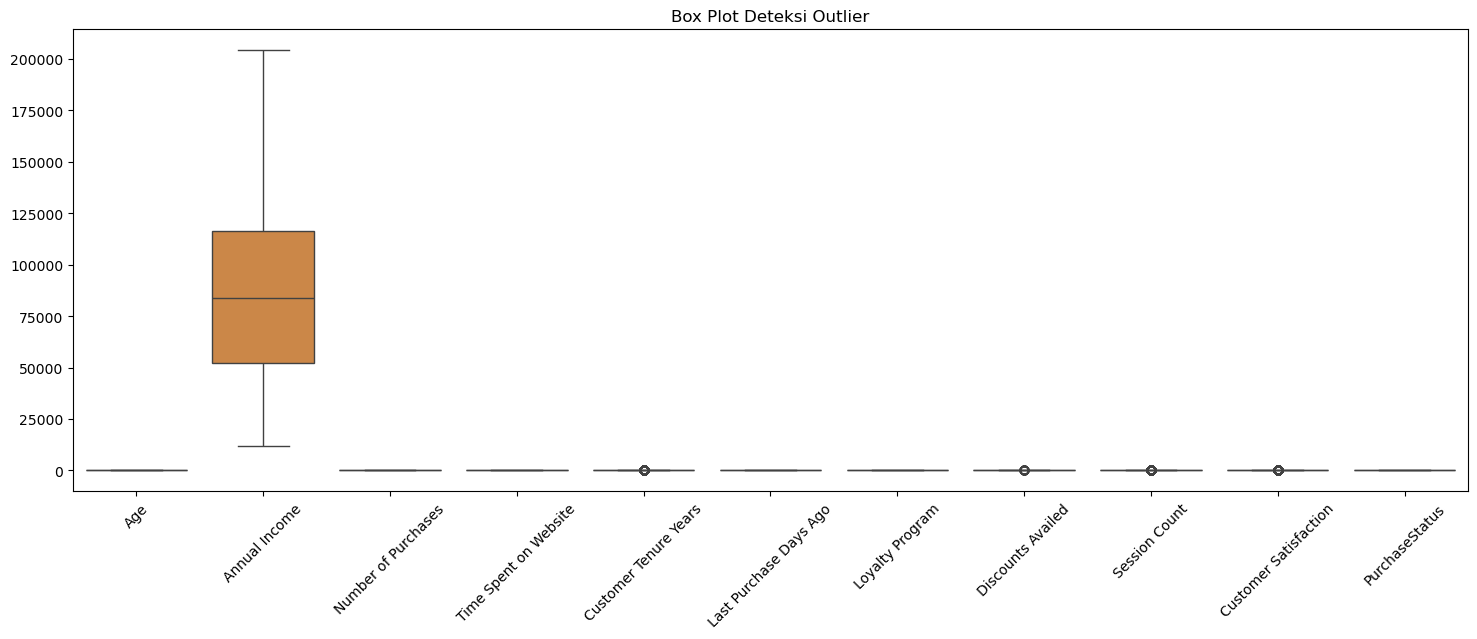

In [24]:
#6. Outlier
#6a. Melihat letak outlier
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numerics])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

In [25]:
#6. Outlier
#6a. Menghitung Outlier dengan metode IQR
#Hitung Q1, Q3 dan IQR untuk kolom numerik
Q1 = df[numerics].quantile(0.25)
Q3 = df[numerics].quantile(0.75)
IQR = Q3 - Q1


#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

#Filter baris oulier
df_outliers = df[((df[numerics] < lower_bound)| (df[numerics] > upper_bound)).any(axis=1)]
print("Data Outlier :", df_outliers.shape[0], "baris") 

Data Outlier : 34060 baris


In [26]:
#7. Feature Engineering
# 7a. Age Group
df['Age Group']= pd.cut(
    df['Age'], 
    bins=[14, 25, 35, 45, 55, 100],
    labels=['15-24', '25-34', '35-44', '45-54', '55+'])
                      
#7b. Income Category
df['Income Category'] = pd.cut(
    df['Annual Income'],
    bins=[-1, 50000, 100000, 500000],
    labels=['Low', 'Mid', 'High'])


#7c. Satisfaction Category
df['Satisfaction Category'] = pd.cut(
    df['Customer Satisfaction'],
    bins=[-1, 1, 2, 3, 4, 5],
    labels=['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
)

# 7d. Recency Category
df['Recency Category'] = pd.cut(
    df['Last Purchase Days Ago'],
    bins=[-1, 7, 30, 90, 365],
    labels=['0-7 days', '8-30 days', '31-90 days', '>90 days']
)

# 7e. Discount Category
df['Discount Usage'] = pd.cut(
    df['Discounts Availed'],
    bins=[-1, 1, 3, 999],
    labels=['Rare', 'Medium', 'Heavy']
)

#7f. Engagement Level
df['Engagement Level'] = pd.cut(
    df['Time Spent on Website'],
    bins=[-1, 5, 15, 100],
    labels = ['Low', 'Medium', 'High']
)
#7g. Loyalty Status
df['Loyalty Status'] = np.where(
    df['Loyalty Program'] == 1, 
    "Member", "Non-Member")

df.head()

,Age,Annual Income,Number of Purchases,Time Spent on Website,Customer Tenure Years,Last Purchase Days Ago,Gender,Product Category,Preferred Device,Region,...,Session Count,Customer Satisfaction,PurchaseStatus,Age Group,Income Category,Satisfaction Category,Recency Category,Discount Usage,Engagement Level,Loyalty Status
0,37,57723,19,5.9,1.1,11,Male,Furniture,Desktop,South,...,3,2,1,35-44,Mid,Dissatisfied,8-30 days,Heavy,Medium,Member
1,63,21329,10,7.0,0.6,20,Female,Furniture,Mobile,East,...,2,3,0,55+,Low,Neutral,8-30 days,Heavy,Medium,Non-Member
2,60,150538,19,35.0,3.9,25,Male,Electronics,Desktop,South,...,5,2,0,55+,High,Dissatisfied,8-30 days,Medium,High,Member
3,19,63509,10,14.8,7.6,20,Male,Furniture,Desktop,West,...,1,3,0,15-24,Mid,Neutral,8-30 days,Rare,Medium,Non-Member
4,54,100400,19,55.9,0.2,92,Male,Electronics,Mobile,South,...,1,2,0,45-54,High,Dissatisfied,>90 days,Heavy,High,Member


In [18]:
df.to_excel('Cleaned Customer Purchase Behavior Dataset (E-Commerce).xlsx', index=False)